In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet

import pickle


import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
pd.set_option('display.max_columns', 500)

In [2]:
last_n_dict = pickle.load(open("last_n_dict.p", "rb" ) )

In [154]:
last5 = last_n_dict[5].loc[~last5.fscore_exp.isnull()]
last5.head()

,season,player_name,game_date,team,opp,home,wl,mp,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,tov,pf,pts,plus_minus,fscore,ast_pct,blk_pct,dreb_pct,oreb_pct,reb_pct,stl_pct,tov_pct,efg_pct,ts_pct,usg_pct,days_off,game_count,fscore_exp,above_avg_fscore,wl_l5,mp_l5,fgm_l5,fga_l5,fg_pct_l5,fg3m_l5,fg3a_l5,fg3_pct_l5,ftm_l5,fta_l5,ft_pct_l5,oreb_l5,dreb_l5,reb_l5,ast_l5,stl_l5,blk_l5,tov_l5,pf_l5,pts_l5,plus_minus_l5,fscore_l5,ast_pct_l5,blk_pct_l5,dreb_pct_l5,oreb_pct_l5,reb_pct_l5,stl_pct_l5,tov_pct_l5,efg_pct_l5,ts_pct_l5,usg_pct_l5,days_off_l5,tm_pace_l5,tm_off_eff_l5,opp_pace_l5,opp_off_eff_l5,opp_def_eff_l5,opp_days_off_l5
0,2000,A.J. Guyton,2000-10-31,CHI,SAC,1,0,4,0,1,0.000,0,1,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,-1,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,12.150668,4.0,1,10.667683,0,0.0,4.0,0.0,1.0,0.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,12.150668,4.0,95.770863,101.249631,95.643037,109.291045,96.012694,4.0
1,2000,Greg Foster,2000-10-31,LAL,POR,0,1,4,1,1,1.000,0,0,0.0,0,0,0.0,0,1,1.0,1,0,0,0,0,2,3,4.75,49.688150,0.0,30.641026,0.0,15.320513,0.0,0.000000,1.000000,1.000000,12.422037,4.0,1,15.412162,0,1.0,4.0,1.0,1.0,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,4.75,49.688150,0.0,30.641026,0.0,15.320513,0.0,0.000000,1.000000,1.000000,12.422037,4.0,97.673868,84.260078,91.393504,89.279910,110.222112,4.0
2,2000,Devean George,2000-10-31,LAL,POR,0,1,3,1,2,0.500,1,2,0.5,0,0,0.0,0,0,0.0,0,0,0,2,1,3,-9,2.50,0.000000,0.0,0.000000,0.0,0.000000,0.0,50.000000,0.750000,0.750000,66.250866,4.0,1,10.576923,0,1.0,3.0,1.0,2.0,0.500,1.0,2.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,-9.0,2.50,0.000000,0.0,0.000000,0.0,0.000000,0.0,50.000000,0.750000,0.750000,66.250866,4.0,97.673868,84.260078,91.393504,89.279910,110.222112,4.0
3,2000,Brian Shaw,2000-10-31,LAL,POR,0,1,15,2,3,0.667,1,1,1.0,2,2,1.0,0,1,1.0,3,0,0,3,1,7,3,11.75,32.268227,0.0,8.170940,0.0,4.085470,0.0,43.604651,0.833333,0.902062,22.790298,4.0,1,30.762195,0,1.0,15.0,2.0,3.0,0.667,1.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0,1.0,3.0,0.0,0.0,3.0,1.0,7.0,3.0,11.75,32.268227,0.0,8.170940,0.0,4.085470,0.0,43.604651,0.833333,0.902062,22.790298,4.0,97.673868,84.260078,91.393504,89.279910,110.222112,4.0
4,2000,Gerard King,2000-10-31,WAS,ORL,0,0,13,3,3,1.000,0,0,0.0,0,0,0.0,0,3,3.0,1,0,0,0,2,6,5,11.25,16.947961,0.0,25.279720,0.0,12.639860,0.0,0.000000,1.000000,1.000000,10.246018,4.0,1,20.625000,0,0.0,13.0,3.0,3.0,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,1.0,0.0,0.0,0.0,2.0,6.0,5.0,11.25,16.947961,0.0,25.279720,0.0,12.639860,0.0,0.000000,1.000000,1.000000,10.246018,4.0,85.095821,83.795707,95.770863,111.871875,103.428715,4.0


In [196]:
def get_Xy_linreg(data_dict, n=5):
    data = data_dict[n]
    x = data.loc[:,'days_off':].loc[~data.fscore_exp.isnull()].drop('above_avg_fscore',1)
    x['home'] = data.home
    y = data.fscore.loc[~data.fscore_exp.isnull()]
    return x,y
        
def get_Xy_logreg(data_dict, n=5):
    data = data_dict[n]
    x = data.loc[:,('wl_l'+str(n)):]
    x['home'] = data.home
    y = data.above_avg_fscore
    return x,y

In [197]:


def year_train_test(data_dict, n=5, year = 2017):
    data = data_dict[n]
    x_train = data.loc[:,'days_off':].loc[data.season != year]
    x_train['home'] = data.home.loc[data.season != year]
    y_train = data.loc[data.season != year].fscore

    x_test = data.loc[:,'days_off':].loc[data.season == year]
    x_test['home'] = data.home.loc[data.season == year]
    y_test = data.loc[data.season == year].fscore
    
    return x_train, x_test, y_train, y_test

def szn_train_test(data_dict, n = 5, year = 2017):
    data = data_dict[n]
    X = data.loc[:,'days_off':].loc[data.season == year]
    X['home'] = data.home.loc[data.season == year]
    y = data.loc[data.season == year].fscore
    return train_test_split(X,y, test_size = .2, random_state=1)

def plyr_train_test(data_dict, player, n = 5):
    data = data_dict[n]
    player_df = data.loc[data.player_name == player]
    x_train = player_df.loc[:,'days_off':][:round((.9*len(player_df)))]
    x_train['home'] = data.home.loc[data.player_name == player]
    y_train = player_df.fscore[:round((.9*len(player_df)))]

    x_test = player_df.loc[:,'days_off':][round((.9*len(player_df))):]
    x_test['home'] = data.home.loc[data.player_name == player]
    y_test = player_df.fscore[round((.9*len(player_df))):]
    
    return x_train, x_test, y_train, y_test

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())



In [198]:
X_train,X_test,y_train,y_test = szn_train_test_log(last_n_dict)
X,y = get_Xy_linreg(last_n_dict,n = 5)

In [199]:
from sklearn.feature_selection import SelectKBest, f_regression,chi2,f_classif
X_scaled = StandardScaler().fit_transform(X)
kbest = SelectKBest(f_regression, k=10)

kbest.fit(X,y)
for label in X.columns[kbest.get_support()]:
    print(label)


fscore_exp
mp_l5
fgm_l5
fga_l5
ftm_l5
fta_l5
dreb_l5
tov_l5
pts_l5
fscore_l5


In [203]:
fts_picked = ['mp_l5', 'pts_l5','ast_l5','reb_l5','stl_l5','blk_l5','tov_l5','fg3m_l5','opp_def_eff_l5','tm_pace_l5', 'home']

fts_kbest = X.columns[kbest.get_support()]
Xp = X[fts_picked]
Xk_ = X[fts_kbest]

In [201]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_scaled = StandardScaler().fit_transform(Xk_train)
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_train)
y_pred = lin_reg.predict(X_scaled)
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


ValueError: Found input variables with inconsistent numbers of samples: [618, 19946]

In [205]:
lin_scores = cross_val_score(scaled_ols(), X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.4992489  0.49936694 0.49840361 0.49837309 0.49764901 0.49795058
 0.50031652 0.49996457 0.49895442 0.49914278]
Mean: 0.4989370417389479
Standard deviation: 0.0008073519495835101


In [206]:
def avg_rmse(X,y, model, cv=5):
    scores = cross_val_score(model, X, y,
                             scoring="neg_mean_squared_error", cv=cv)
    rmse_scores = np.sqrt(-scores)
    return rmse_scores.mean()

def avg_score(X,y, model,score="neg_mean_squared_error", cv=5):
    scores = cross_val_score(model, X, y,
                             scoring=score, cv=cv)
    if score == "neg_mean_squared_error":
        scores = np.sqrt(-scores)
    return scores.mean()

def scaled_ridge(alpha = 1):
    sc_ridge = Pipeline([
        ("scaler", StandardScaler()),
        ("ridge", Ridge(alpha = alpha)),
        ]) 
    return sc_ridge

def scaled_lasso(alpha = 1):
    sc_ridge = Pipeline([
        ("scaler", StandardScaler()),
        ("ridge", Lasso(alpha = alpha)),
        ]) 
    return sc_ridge

def scaled_ols(alpha = 1):
    sc_ols = Pipeline([
        ("scaler", StandardScaler()),
        ("ridge", LinearRegression()),
        ]) 
    return sc_ols

In [207]:
avg_score(X_train, y_train, scaled_ols(), score='r2')

0.004818129114744307

In [208]:
avg_score(X_train, y_train, scaled_lasso(),score='r2')

-0.0004418207302934185

In [209]:
avg_score(X_train, y_train, scaled_ridge(), score='r2')

0.004804162802337442

In [211]:
for key in sorted(last_n_dict.keys()):
    X_train,X_test,y_train,y_test = szn_train_test(last_n_dict, year = 2017, n=key)
    rmse = avg_score(X_train,y_train,scaled_ridge(),cv=10)
    print('last',key)
    print("Mean: {}".format(rmse),'\n')

last 1
Mean: 6.134085009452781 

last 3
Mean: 6.092729016140991 

last 5
Mean: 6.081595070954097 

last 7
Mean: 6.075042739299618 

last 10
Mean: 6.065080003786276 

last 15
Mean: 6.065762320901785 

last 20
Mean: 6.072116379481036 



In [31]:
for key in sorted(last_n_dict.keys()):
    X_train,X_test,y_train,y_test = szn_train_test(last_n_dict,  year = 2017, n=key)
    rmse = avg_rmse(X_train,y_train,scaled_lasso(),10)
    print('last',key)
    print("Mean: {}".format(rmse),'\n')

last 1
Mean: 6.32294228829534 

last 3
Mean: 6.2836796882750825 

last 5
Mean: 6.270739035669548 

last 7
Mean: 6.261674275853071 

last 10
Mean: 6.2459529991587965 

last 15
Mean: 6.246098182115103 

last 20
Mean: 6.250059683483644 



In [32]:
for key in sorted(last_n_dict.keys()):
    X_train,X_test,y_train,y_test = szn_train_test(last_n_dict, n=key)
    rmse = avg_rmse(X_train,y_train,scaled_ols())
    print('last',key)
    print("Mean: {}".format(rmse),'\n')

last 1
Mean: 6.138877705824542 

last 3
Mean: 6.094288730841071 

last 5
Mean: 6.099109629128705 

last 7
Mean: 6.081930873564024 

last 10
Mean: 6.065387586234768 

last 15
Mean: 6.067116361603868 

last 20
Mean: 6.076253316886084 



In [16]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_scaled, y_train)
y_pred = tree_reg.predict(X_scaled)
tree_mse = mean_squared_error(y_train, y_pred)
tree_mse = np.sqrt(tree_mse)

scores = cross_val_score(tree_reg, X_scaled, y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

ValueError: Number of labels=19946 does not match number of samples=618

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
def scaled_tree():
    sc_tree = Pipeline([
        ("scaler", StandardScaler()),
        ("tree", DecisionTreeRegressor()),
        ]) 
    return sc_tree

def scaled_forest(max_depth = 2):
    sc_forest = Pipeline([
        ("scaler", StandardScaler()),
        ("tree", RandomForestRegressor(max_depth=max_depth)),
        ]) 
    return sc_forest

In [34]:
for key in sorted(last_n_dict.keys()):
    X_train,X_test,y_train,y_test = szn_train_test(last_n_dict, n=key, year = 2017)
    rmse = avg_rmse(X_train,y_train,scaled_tree())
    print('last',key)
    print("Mean: {}".format(rmse),'\n')

last 1
Mean: 8.598612325534278 

last 3
Mean: 8.526124471615198 

last 5
Mean: 8.48284827512973 

last 7
Mean: 8.515429404781276 

last 10
Mean: 8.372662965264535 

last 15
Mean: 8.482357803716113 

last 20
Mean: 8.414108747127443 



In [19]:
X_train,X_test,y_train,y_test = plyr_train_test(last_n_dict, player='James Harden', n=key)
from sklearn.ensemble import RandomForestRegressor
X_scaled = StandardScaler().fit_transform(X_train)
forest_reg = RandomForestRegressor(max_depth=2)

scores = cross_val_score(forest_reg, X_scaled, y_train,
                         scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

Scores: [12.55497949 12.03461567 12.70432672  8.3670684  15.77491986]
Mean: 12.28718202768358
Standard deviation: 2.359708499478915


In [20]:
for key in sorted(last_n_dict.keys()):
    X_train,X_test,y_train,y_test = szn_train_test(last_n_dict, n=key, year=2017)
    rmse = avg_rmse(X_train,y_train,scaled_forest(2))
    print('last',key)
    print("Mean: {}".format(rmse),'\n')

last 1
Mean: 8.231760707115157 

last 3
Mean: 8.180093036793783 

last 5
Mean: 8.304010656497164 

last 7
Mean: 8.645462883978642 

last 10
Mean: 8.478979996087538 

last 15
Mean: 8.380361200922133 

last 20
Mean: 8.362146107200923 



In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_features': [5,10,15,20], 'max_depth' : [2,3,4,5]}
#    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')

grid_search.fit(X_scaled, y_train)
grid_search.best_params_

ValueError: Found input variables with inconsistent numbers of samples: [618, 19946]

In [179]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [180]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.        , 0.00319944, 0.        , 0.01522213, 0.00681516,
       0.15995415, 0.        , 0.        , 0.09010569, 0.        ,
       0.16832208, 0.07824394, 0.00273374, 0.        , 0.00273468,
       0.00443496, 0.1909288 , 0.00227217, 0.        , 0.00078702,
       0.00086054, 0.        , 0.00233895, 0.09765507, 0.01904201,
       0.        , 0.00075184, 0.        , 0.        , 0.        ,
       0.01249231, 0.        , 0.00054533, 0.10658274, 0.        ,
       0.01266734, 0.00848346, 0.00195935, 0.        , 0.01021138,
       0.0006557 , 0.        ])

In [181]:
sorted(zip(feature_importances, X_train.columns), reverse=True)

[(0.19092880350165445, 'ast_l20'),
 (0.1683220825565735, 'ftm_l20'),
 (0.15995414941371805, 'fga_l20'),
 (0.1065827364689308, 'usg_pct_l20'),
 (0.09765506598684684, 'fscore_l20'),
 (0.09010569366462207, 'fg3a_l20'),
 (0.0782439435466191, 'fta_l20'),
 (0.01904201158525199, 'ast_pct_l20'),
 (0.015222127469787202, 'mp_l20'),
 (0.012667341495342089, 'tm_pace_l20'),
 (0.012492314551856695, 'tov_pct_l20'),
 (0.010211380815692471, 'opp_def_eff_l20'),
 (0.008483455650691425, 'tm_off_eff_l20'),
 (0.006815159853795313, 'fgm_l20'),
 (0.0044349635017714, 'reb_l20'),
 (0.0031994446912351647, 'game_count'),
 (0.0027346788666891826, 'dreb_l20'),
 (0.0027337400706606936, 'ft_pct_l20'),
 (0.0023389519668537196, 'plus_minus_l20'),
 (0.002272165019277047, 'stl_l20'),
 (0.001959354210146042, 'opp_pace_l20'),
 (0.0008605430675756138, 'pf_l20'),
 (0.0007870197923208316, 'tov_l20'),
 (0.0007518440934789831, 'dreb_pct_l20'),
 (0.0006556961134159283, 'opp_days_off_l20'),
 (0.0005453320451934897, 'ts_pct_l20'),

In [183]:
final_model = grid_search.best_estimator_

X_test_prepared = StandardScaler().fit_transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

19.458615928751538

In [99]:
def szn_train_test_log(data_dict, n = 5, year = 2017):
    data = data_dict[n]
    X = data.loc[:,('wl_l'+str(n)):].loc[data.season == year]
    X['home'] = data.home.loc[data.season == year]
    y = data.loc[data.season == year].above_avg_fscore
    return train_test_split(X,y, test_size = .2, random_state=1)

def plyr_train_test_log(data_dict, player, n = 5):
    data = data_dict[n]
    player_df = data.loc[data.player_name == player]
    X = player_df.loc[:,('wl_l'+str(n)):]
    X['home'] = data.home.loc[data.player_name == player]
    y = player_df.above_avg_fscore
    
    return train_test_split(X,y, test_size = .2, random_state=1)

def year_train_test_log(data_dict, n=5, year = 2017):
    data = data_dict[n]
    x_train = data.loc[:,('wl_l'+str(n)):].loc[data.season != year]
    x_train['home'] = data.home.loc[data.season != year]
    y_train = data.loc[data.season != year].above_avg_fscore

    x_test = data.loc[:,('wl_l'+str(n)):].loc[data.season == year]
    x_test['home'] = data.home.loc[data.season == year]
    y_test = data.loc[data.season == year].above_avg_fscore
    
    return x_train, x_test, y_train, y_test

def scaled_log():
    sc_log = Pipeline([
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression()),
        ]) 
    return sc_log

In [103]:

# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = year_train_test_log(last_n_dict, n = 10)

# Create the classifier: logreg
logreg = scaled_log()

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5789 6779]
 [4943 7422]]
             precision    recall  f1-score   support

          0       0.54      0.46      0.50     12568
          1       0.52      0.60      0.56     12365

avg / total       0.53      0.53      0.53     24933



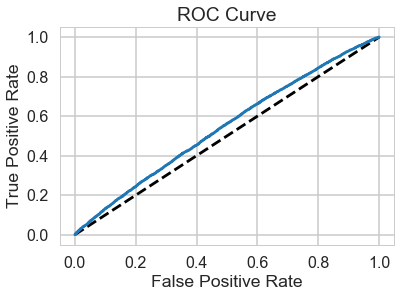

In [104]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [105]:


# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg,X_train,y_train,cv=10,scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.5442601676720935
AUC scores computed using 5-fold cross-validation: [0.5512855  0.55257079 0.56260058 0.56404457 0.55907784 0.55677902
 0.54297581 0.55210313 0.54131217 0.55517626]
